#  Maîtriser les expressions régulières

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04b_regex_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04b_regex_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04b_regex_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=%C2%ABpython-datascientist%C2%BB&resources.requests.memory=%C2%AB4Gi%C2%BB)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=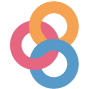)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=notebooks/course/manipulation/04b_regex_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04b_regex_TP.ipynb)

Chercher un mot dans un texte est une tâche facile, c'est l'objectif de la méthode find attachée aux chaînes de caractères, elle suffit encore lorsqu'on cherche un mot au pluriel ou au singulier mais il faut l'appeler au moins deux fois pour chercher ces deux formes. 

Pour des expressions plus compliquées, il est conseillé d'utiliser les expressions régulières. C'est une fonctionnalité qu'on retrouve dans beaucoup de langages. C'est une forme de grammaire qui permet de rechercher des expressions.


Lorsqu'on remplit un formulaire, on voit souvent le format ``"MM/JJ/AAAA"`` qui précise sous quelle forme on s'attend à ce qu’une date soit écrite. Les expressions régulières permettent de définir également ce format et de chercher dans un texte toutes les chaînes de caractères qui sont conformes à ce format.

La liste qui suit contient des dates de naissance. On cherche à obtenir toutes les dates de cet exemple sachant que les jours ou les mois contiennent un ou deux chiffres, les années deux ou quatre.


In [ ]:
s = """date 0 : 14/9/2000
date 1 : 20/04/1971     date 2 : 14/09/1913     date 3 : 2/3/1978
date 4 : 1/7/1986     date 5 : 7/3/47     date 6 : 15/10/1914
date 7 : 08/03/1941     date 8 : 8/1/1980     date 9 : 30/6/1976"""

#### Exemple introductif : Format de date 

Le premier chiffre du ``jour`` est soit 0, 1, 2, ou 3 ; ceci se traduit par ``[0-3]``. 

Le second chiffre est compris entre 0 et 9, soit ``[0-9]``. Le format des jours est traduit par ``[0-3][0-9]``. Mais le premier jour est facultatif, ce qu'on précise avec le symbole ? : ``[0-3]?[0-9]``. 

Les ``mois`` suivent le même principe : ``[0-1]?[0-9]``. 


Pour les ``années``, ce sont les deux premiers chiffres qui sont facultatifs, le symbole ? s'appliquent sur les deux premiers chiffres : ``[0-2]?[0-9]?[0-9][0-9]``. Le format final d'une date devient :

In [ ]:
[0-3]?[0-9]/[0-1]?[0-9]/[0-2]?[0-9]?[0-9][0-9]

Le module re gère les expressions régulières, celui-ci traite différemment les parties de l'expression régulière qui sont entre parenthèses de celles qui ne le sont pas : c'est un moyen de dire au module re que nous nous intéressons à telle partie de l'expression qui est signalée entre parenthèses. Comme la partie qui nous intéresse - une date - concerne l'intégralité de l'expression régulière, il faut insérer celle-ci entre parenthèses.

La première étape consiste à construire l'expression régulière, la seconde à rechercher toutes les fois qu'un morceau de la chaîne s définie plus haut correspond à l’expression régulière.


In [ ]:
import re
# première étape : construction
expression = re.compile("([0-3]?[0-9]/[0-1]?[0-9]/[0-2]?[0-9]?[0-9][0-9])")
# seconde étape : recherche
res = expression.findall(s)
print(res)

```
## ['14/9/2000', '20/04/1971', '14/09/1913', '2/3/1978', '1/7/1986', '7/3/47', '15/10/1914', '08/03/1941', '8/1/1980', '30/6/1976']
```

Le résultat une liste dont chaque élément correspond aux parties comprises entre parenthèses qu'on appelle des groupes. 

Lorsque les expressions régulières sont utilisées, on doit d'abord se demander comment définir ce qu’on cherche puis quelles fonctions utiliser pour obtenir les résultats de cette recherche. Les deux paragraphes qui suivent y répondent.

## Syntaxe

La syntaxe des expressions régulières est décrite sur le site officiel de python. La page [Regular Expression Syntax](https://docs.python.org/3/library/re.html?highlight=re#regular-expression-syntax) décrit comment se servir des expressions régulières, les deux pages sont en anglais. Comme toute grammaire, celle des expressions régulières est susceptible d’évoluer au fur et à mesure des versions du langage python.

## Les ensembles de caractères
Lors d’une recherche, on s’intéresse aux caractères et souvent aux classes de caractères : on cherche un chiffre, une lettre, un caractère dans un ensemble précis ou un caractère qui n’appartient pas à un ensemble précis. Certains ensembles sont prédéfinis, d’autres doivent être définis à l’aide de crochets.

Pour définir un ensemble de caractères, il faut écrire cet ensemble entre crochets : [0123456789] désigne un chiffre. Comme c’est une séquence de caractères consécutifs, on peut résumer cette écriture en [0-9]. Pour inclure les symboles -, +, il suffit d’écrire : [-0-9+]. Il faut penser à mettre le symbole - au début pour éviter qu’il ne désigne une séquence.

Le caractère ^ inséré au début du groupe signifie que le caractère cherché ne doit pas être un de ceux qui suivent. Le tableau suivant décrit les ensembles prédéfinis et leur équivalent en terme d’ensemble de caractères :

* ``.`` désigne tout caractère non spécial quel qu'il soit.
* ``\d`` désigne tout chiffre, est équivalent à ``[0-9]``.
* ``\D`` désigne tout caractère différent d'un chiffre, est équivalent à ``[^0-9]``.
* ``\s`` désigne tout espace ou caractère approché, est équivalent à ``[\; \t\n\r\f\v]``. Ces caractères sont spéciaux, les plus utilisés sont ``\t`` qui est une tabulation, ``\n`` qui est une fin de ligne et qui ``\r`` qui est un retour à la ligne.
* ``\S`` désigne tout caractère différent d'un espace, est équivalent à ``[^ \t\n\r\f\v]``.
* ``\w`` désigne tout lettre ou chiffre, est équivalent à ``[a-zA-Z0-9_]``.
* ``\W`` désigne tout caractère différent d'une lettre ou d'un chiffre, est équivalent à ``[^a-zA-Z0-9_]``.
* ``^`` désigne le début d'un mot sauf s'il est placé entre crochets.
* ``$`` désigne la fin d'un mot sauf s'il est placé entre crochets.

A l'instar des chaînes de caractères, comme le caractère ``\`` est un caractère spécial, il faut le doubler : ``[\\]``.

## Les multiplicateurs
Les multiplicateurs permettent de définir des expressions régulières comme : un mot entre six et huit lettres qu’on écrira ``[\w]{6,8}``. Le tableau suivant donne la liste des multiplicateurs principaux :

* ``*`` présence de l'ensemble de caractères qui précède entre 0 fois et l'infini
* ``+`` présence de l'ensemble de caractères qui précède entre 1 fois et l'infini
* ``?`` présence de l'ensemble de caractères qui précède entre 0 et 1 fois
* ``{m,n}`` présence de l'ensemble de caractères qui précède entre *m* et *n* fois, si *m=n*, cette expression peut être résumée par ``{n}``.
* ``(?!(...))`` absence du groupe désigné par les points de suspensions.

L’algorithme des expressions régulières essaye toujours de faire correspondre le plus grand morceau à l’expression régulière. 


In [ ]:
"<h1>mot</h1>"

```
## '<h1>mot</h1>'
```

``<.*>`` correspond avec ``<h1>``, ``</h1>`` ou encore ``<h1>mot</h1>``.

Par conséquent, l’expression régulière correspond à trois morceaux. Par défaut, il prendra le plus grand. Pour choisir les plus petits, il faudra écrire les multiplicateurs comme ceci : ``*?``, ``+?``


In [ ]:
import re
s = "<h1>mot</h1>"
expression = re.compile("<.*>")
# seconde étape : recherche
res = expression.findall(s)
print(res)


```
## ['<h1>mot</h1>']
```

In [ ]:
print(re.compile("(<.*>)").match(s).groups())   # ('<h1>mot</h1>',)

```
## ('<h1>mot</h1>',)
```


In [ ]:
print(re.compile("(.*</h1>)").match(s))

```
## <re.Match object; span=(0, 12), match='<h1>mot</h1>'>
```


In [ ]:
print(re.compile(".*(<.h1>)").match(s).groups())  # ('<h1>',)

```
## ('</h1>',)
```

In [ ]:
print(re.compile("(<.?h1>)").findall(s))  # ('<h1>',)

```
## ['<h1>', '</h1>']
```

Un exemple pour trouver des adresses emails : 


In [ ]:
text_emails = 'Hello from shubhamg199630@gmail.com to priya@yahoo.com about the meeting @2PM'

In [ ]:
liste_emails = re.findall('\S+@\S+', text_emails)     

In [ ]:
print(liste_emails)

```
## ['shubhamg199630@gmail.com', 'priya@yahoo.com']
```

## Exercice 1

Recherchez les dates présentes dans la phrase suivante


In [ ]:
texte = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Ma seconde femme est morte le 10/11/1963. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """

Puis dans celle-ci : 


In [ ]:
texte = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Je me suis marié le 8/5/45. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """

## Exercice 2 (version non guidée)

Nettoyer des colonnes d'un DataFrame en utilisant des expressions régulières.

La base en question contient des livres de la British Library et quelques informations les concernant. 

à partir du jeu de données suivant 'https://raw.githubusercontent.com/realpython/python-data-cleaning/master/Datasets/BL-Flickr-Images-Book.csv' préparer un jeu de données où la colonne "Date of Publication" est au format numérique et ne contient que des dates. 

Réalisez l'histogramme de la répartition des années de publication.


## Exercice 2 (version guidée)

Nettoyer des colonnes d'un DataFrame en utilisant des expressions régulières.

La base en question contient des livres de la British Library et quelques informations les concernant. 


In [ ]:
import pandas

data_books = pandas.read_csv('https://raw.githubusercontent.com/realpython/python-data-cleaning/master/Datasets/BL-Flickr-Images-Book.csv',sep=',')

In [ ]:
data_books=data_books[['Identifier', 'Place of Publication',
       'Date of Publication', 'Publisher', 'Title', 'Author']]

In [ ]:
data_books[['Date of Publication',"Title"]].iloc[13:20]

```
##    Date of Publication                                              Title
## 13         1839, 38-54  De Aardbol. Magazijn van hedendaagsche land- e...
## 14                1897  Cronache Savonesi dal 1500 al 1570 ... Accresc...
## 15                1865  See-Saw; a novel ... Edited [or rather, writte...
## 16             1860-63  Géodésie d'une partie de la Haute Éthiopie,...
## 17                1873                                [With eleven maps.]
## 18                1866  [Historia geográfica, civil y politica de la ...
## 19                1899  The Crisis of the Revolution, being the story ...
```

La colonne "Date de Publication" n'est pas toujours une année, il y a parfois d'autres informations. 

Le but de l'exercice est d'avoir une date de publication du livre propre.

1) La première chose à faire est de regarder la base afin de s'assurer que les opérations de regex sont cohérentes avec les informations présentes initialement. 

Pour cela, on commence par regarde le nombre d'informations manquantes (on ne pourra pas avoir mieux après la regex, et normalement on ne devrait pas avoir moins...)

2) on détermine la forme de la regex pour une date de publication. A priori, il y a 4 chiffres qui forment une année.

3) on applique notre regex à la colonne qui nous intéresse avec la fonction str.extract()

On a 2 Nan qui n'étaient pas présents au début de l'exercice, pourquoi ?

On vérifier que notre opération s'est bien déroulée en regardant les éléments qui ont été changés. 

4) En bonus, on peut regarder la répartition des dates de publications dans le jeu de données